In [1]:
import cv2                       
import numpy as np                
import matplotlib.pyplot as plt 
%matplotlib inline
from opening import custom_opening_rectangle
from erosion import custom_erosion_rectangle
from delation import custom_dilation_rectangle
from closing import custom_closing_rectangle

In [2]:
image = cv2.imread('data/archive(1)/images/source.png')

In [3]:
def show_image(img, title, colorspace):
    dpi = 96
    figsize = (img.shape[1] / dpi, img.shape[0] / dpi)
    fig, ax = plt.subplots(figsize = figsize, dpi = dpi)
    if colorspace == 'RGB':
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), interpolation = 'spline16')
    if colorspace == 'gray':
        plt.imshow(img, cmap = 'gray')
    plt.title(title, fontsize = 12)
    ax.axis('off')
    plt.show()

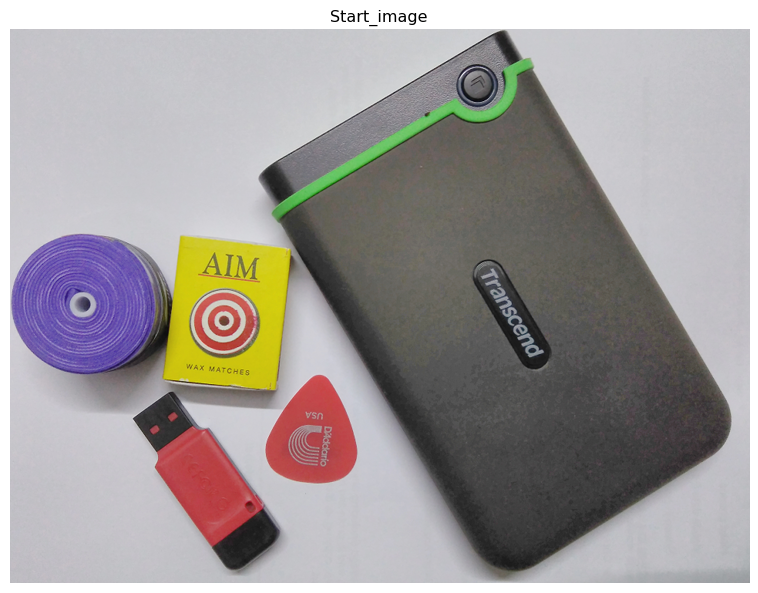

In [4]:
show_image(image, 'Start_image', 'RGB')

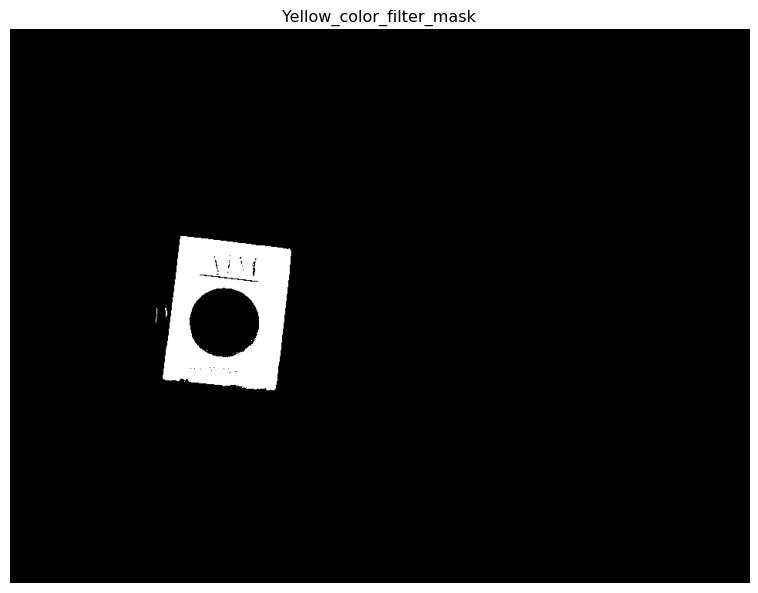

In [5]:

src_img_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

yellow_lower = np.array([16, 100, 100])
yellow_upper = np.array([45, 255, 255])

mask = cv2.inRange(src_img_hsv, yellow_lower, yellow_upper)

show_image(mask, 'Yellow_color_filter_mask', 'gray')



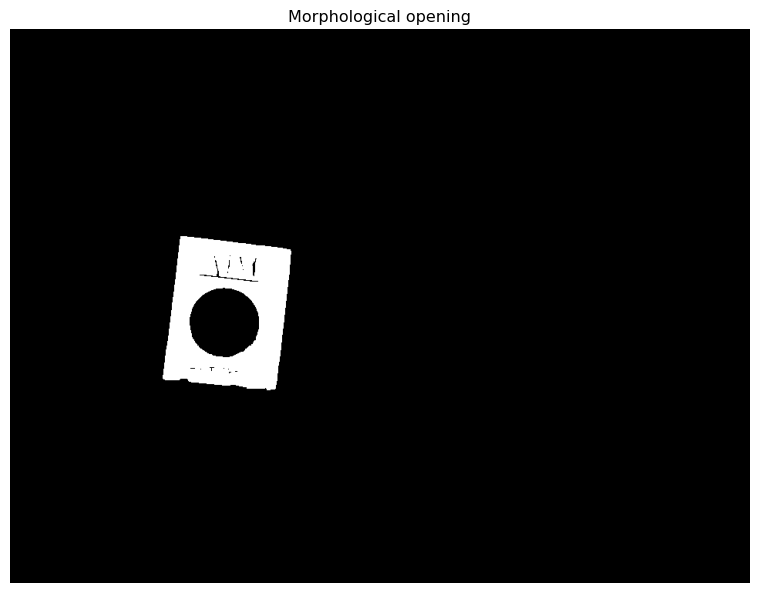

In [6]:
kernel = np.ones((5, 5), np.uint8)
c = custom_opening_rectangle(mask, kernel)
show_image(c, 'Morphological opening', 'gray')

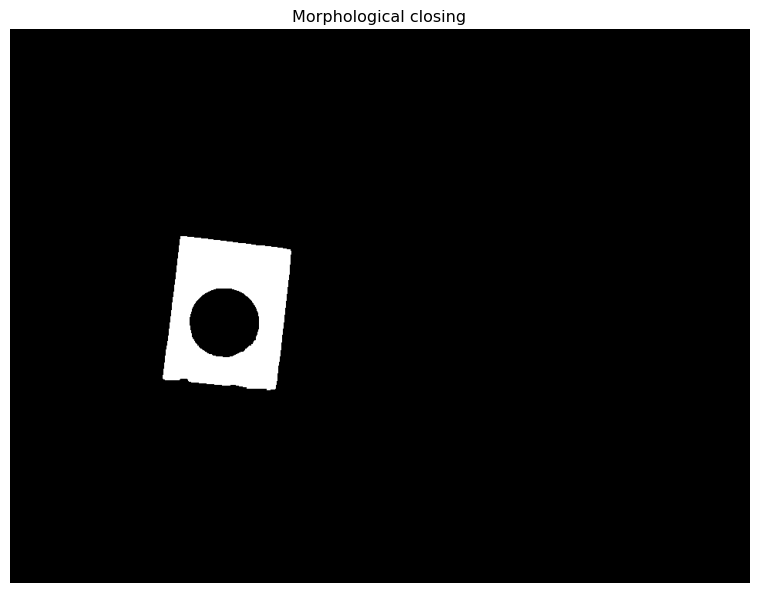

In [7]:
c1 = custom_closing_rectangle(c, kernel)

show_image(c1, 'Morphological closing', 'gray')

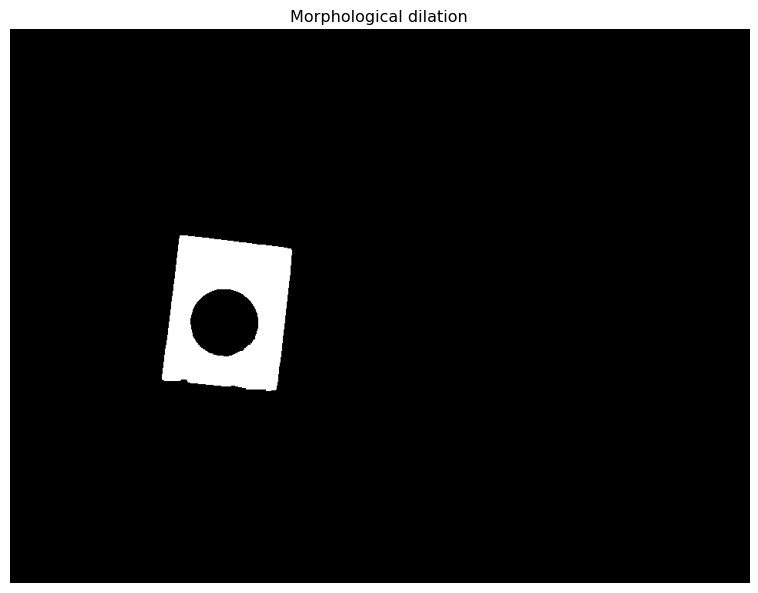

In [8]:
kernel1 = np.ones((3, 3), np.uint8)
d = custom_dilation_rectangle(c1, kernel1)

show_image(d, 'Morphological dilation', 'gray')

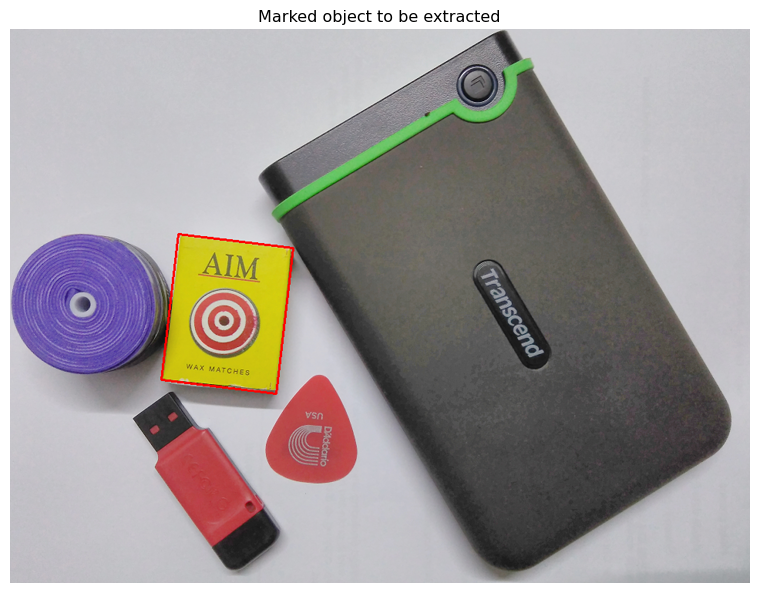

In [9]:
contours, _ = cv2.findContours(d, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
k = max(contours, key = cv2.contourArea)
rect = cv2.minAreaRect(k)

box = cv2.boxPoints(rect)
box = np.int0(box)
temp_img = image.copy()
bdg_rect = cv2.drawContours(temp_img, [box], 0, (0, 0, 255), 2)

show_image(bdg_rect, 'Marked object to be extracted', 'RGB')

In [10]:
width = box[0][0] - box[1][0]
height = box[1][1] - box[2][1]

src_pts = box.astype('float32')
dst_pts = np.array([[width, height],
                    [0, height],
                    [0, 0],
                    [width, 0]], dtype = 'float32')

M = cv2.getPerspectiveTransform(src_pts, dst_pts)

warped = cv2.warpPerspective(image, M, (width, height))

query_img = warped

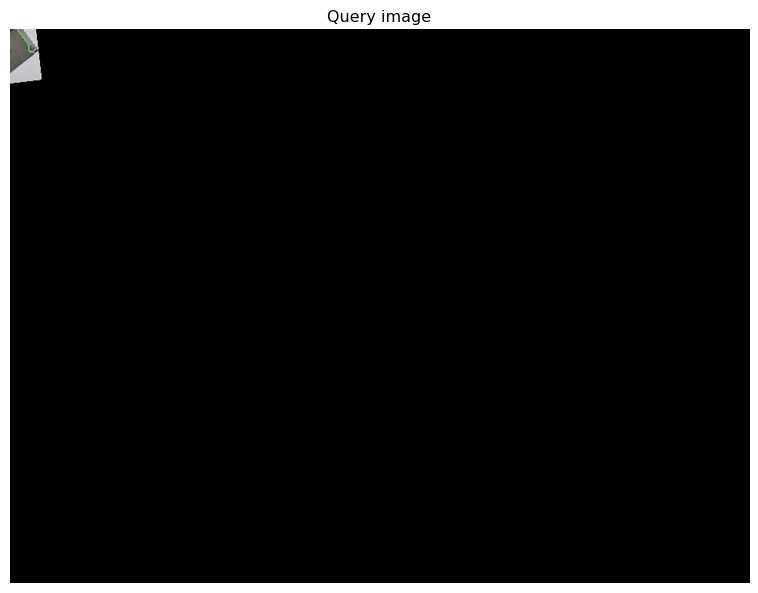

In [11]:
show_image(query_img, 'Query image', 'RGB')

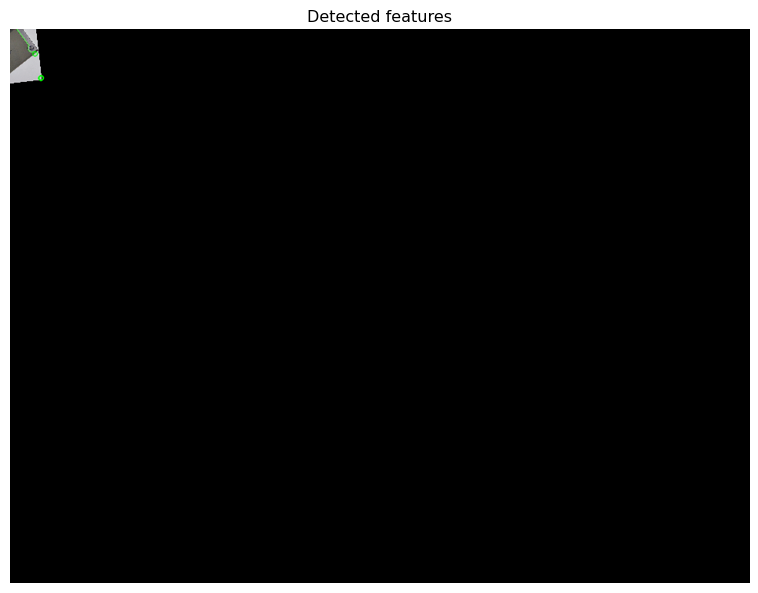

In [12]:


# Create an ORB object
orb = cv2.ORB_create()

# Detect and visualize the features
features = orb.detect(query_img, None)
f_img = cv2.drawKeypoints(query_img, features, None, color = (0, 255, 0), flags = 0)

show_image(f_img, 'Detected features', 'RGB')

